<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/ytarazona/scikit-eo/blob/main/examples/04_K_means_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 04 K-means classification</font></div>_**

# 1.0 Libraries

To install ```scikit-eo``` and ```rasterio``` you can do it with the following line:

In [ ]:
!pip install scikeo rasterio

Libraries to be used:

In [2]:
import rasterio
import numpy as np
from scikeo.rkmeans import rkmeans
import matplotlib.pyplot as plt
from scikeo.plot import plotRGB

Connecting to Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.0 Optical image

Landsat-8 OLI (Operational Land Imager) will be used. This image, which is in surface reflectance, contain bands:
- Blue -> B2
- Green -> B3
- Red -> B4
- Nir -> B5
- Swir1 -> B6
- Swir2 -> B7

The image to be used can be downloaded [here](https://drive.google.com/drive/folders/1kVGIPUL9qzAndevx_B5VBaZdWmEXploG?usp=sharing):

## 3.0 Unsupervised Classification

The image:

In [14]:
path_raster = "/content/drive/MyDrive/Packages/scikit-eo_data/04_kmeans/LC08_232066_20190727_SR.tif"
img = rasterio.open(path_raster)

Applying ```rkmeans()``` algorithm with four classes:

In [17]:
arr_rkmeans = rkmeans(image = img, k = 4, max_iter = 300)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Applying the ```plotRGB``` algorithm is easy:

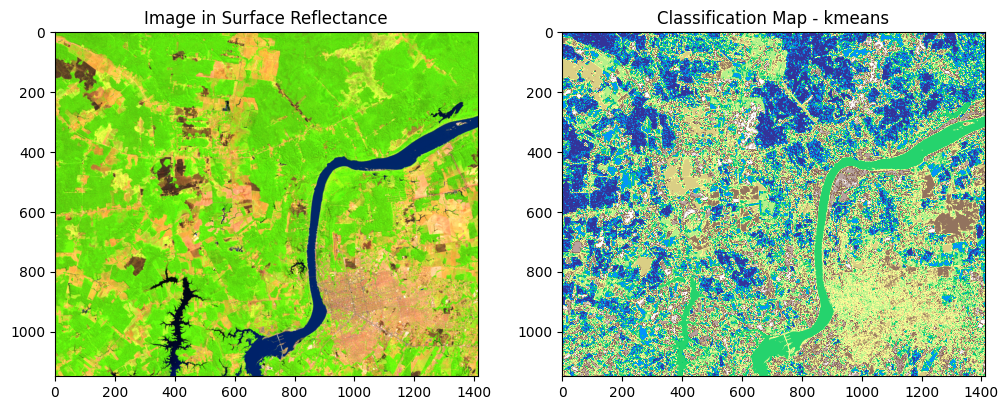

In [18]:
# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 7))

# satellite image
plotRGB(img, bands = [5,4,3], title = 'Image in Surface Reflectance', ax = axes[0])
# class results
axes[1].imshow(arr_rkmeans, cmap = 'terrain')
axes[1].set_title("Classification Map - kmeans")
axes[1].grid(False)
plt.show()